# Тема “Элементы теории вероятностей”

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import itertools

### 1. Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [2]:
np.random.randint(0, 37)

16

### 2.1 Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.

In [3]:
# Имеем 2 рулетки. Проводим n испытаний. Запуски независимы.
# Проверяем P(AB) = P(A)*P(B)
# Ищем вероятность выпадания зеро на обоих рулетках в результате опыта
n = 1000000 # опыт
r1 = np.random.randint(0, 37, n) # запуски рулетки №1
r2 = np.random.randint(0, 37, n) # запуски рулетки №2
success = 0
for i in range(n):
    if r1[i] == 0 and r2[i] == 0:
        success += 1
print(f"В {success} из {n} случаях при запуске двух рулеток выпадали зеро.")
print(f"Вероятность в опыте: {success/n}")
print(f"Вероятность по расчете: {1/(37*37)}")

В 747 из 1000000 случаях при запуске двух рулеток выпадали зеро.
Вероятность в опыте: 0.000747
Вероятность по расчете: 0.0007304601899196494


### 2.2 Сгенерируйте десять выборок случайных чисел х0, …, х9. и постройте гистограмму распределения случайной суммы х0+х1+ …+ х9.

In [4]:
a = np.random.randint(0, 100, (10,10))
a

array([[66, 42,  7, 14, 67, 69, 27, 21, 94, 28],
       [17, 67, 90,  3, 82, 28, 96, 99, 49, 27],
       [19, 81, 66, 82,  3, 14, 17, 66, 51, 39],
       [74, 74, 88, 81, 82,  0, 79, 49, 89, 54],
       [60, 68, 73, 48, 73, 19, 98, 37, 93, 97],
       [91, 69, 23,  4, 32, 57, 26, 69, 94, 37],
       [83, 92, 58, 35,  4, 11, 65, 83, 31, 77],
       [ 6, 92, 29, 60, 36, 60, 19,  8, 91,  6],
       [49, 62, 62,  0, 25,  9, 51, 29, 36, 13],
       [79, 87, 11, 79, 67, 94, 11, 91, 24, 78]])

In [5]:
s = [0]*len(a)
for i,v in enumerate(a):
    s[i] = np.sum(v)
s

[435, 558, 438, 670, 666, 502, 539, 407, 336, 621]

Text(0.5, 1.0, 'Histogram')

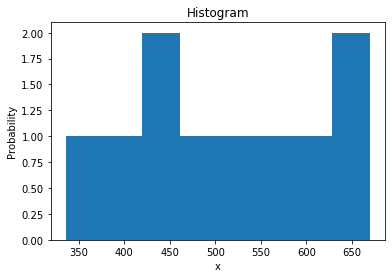

In [6]:
num_bins = 8
n, bins, patches = plt.hist(s, num_bins)
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Histogram')

### 3.1 Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) и сравните результаты.

In [7]:
k, n = 0, 10000
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
x = a + b + c + d
for i in range(0, n):
    if x[i] == 2:
        k = k + 1
print(k/n)

0.376


In [8]:
nn = 4
kk = 2
fa = np.math.factorial
C_k_n = fa(nn)/(fa(kk)*fa(nn-kk))
P_n_k = C_k_n * (1 / (2**nn))
print(P_n_k)

0.375


### 3.2 Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k.

In [9]:
k, n = 0, 10000
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
x = a + b + c + d
for i in range(0, n):
    if x[i] == 0:
        k = k + 1
print(k/n)

0.0562


In [10]:
nn = 4
kk = 0
fa = np.math.factorial
C_k_n = fa(nn)/(fa(kk)*fa(nn-kk))
P_n_k = C_k_n * (1 / (2**nn))
print(P_n_k)

0.0625


### 4. Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k

In [11]:
v = []
for p in itertools.permutations("123456",2):
    v.append(''.join(str(x) for x in p))
print(v)

['12', '13', '14', '15', '16', '21', '23', '24', '25', '26', '31', '32', '34', '35', '36', '41', '42', '43', '45', '46', '51', '52', '53', '54', '56', '61', '62', '63', '64', '65']


### 5. Дополните код расчетом коэффициента корреляции x и y по формуле


0.6849046530061083 0.1780529667816722
0.6849046530061087 0.17805296678167232


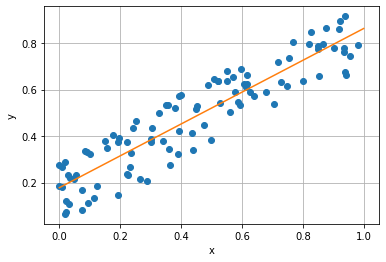

In [12]:
n = 100
r = 0.7
x = np.random.rand(n)
y = r*x + (1 - r)*np.random.rand(n)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

a = (np.sum(x)*np.sum(y) - n*np.sum(x*y))/(np.sum(x)*np.sum(x) - n*np.sum(x*x))
b = (np.sum(y) - a*np.sum(x))/n

A = np.vstack([x, np.ones(len(x))]).T
a1, b1 = np.linalg.lstsq(A, y, rcond=None)[0]
print(a, b)
print(a1, b1)
plt.plot([0, 1], [b, a + b])
plt.show()

In [13]:
x_m = np.sum(x)/n
y_m = np.sum(y)/n
x_d = x - x_m
y_d = y - y_m
R = np.sum(x_d * y_d) / np.sqrt(np.sum(x_d * x_d) * np.sum(y_d * y_d))
print(R)

print(np.corrcoef(x, y)[0,1])

0.9198366431497719
0.9198366431497725
